<center><h1>Lab02 Sheet</h1></center>

**Student ID: 22670287** <br>
**Student Name: Xiaoyan Huang**<br>
**Create Data: 10/3/2020**<br>
**End Data: 19/3/2020**<br>

Analyzing Forest type mapping dataset by Machine Learning

### 1. Get the data

In [1]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


In [3]:
test.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [4]:
train.shape

(325, 28)

In [5]:
test.shape

(198, 28)

In [6]:
train.describe()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,...,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,58.021538,38.381538,61.467692,96.175385,58.098462,99.196923,85.864615,27.375385,58.880000,55.786769,...,-3.341446,-20.004954,-1.086092,-4.375846,-21.664185,-0.979815,-4.633323,-18.996462,-1.701785,-4.229108
std,11.705076,14.589516,15.003385,11.120136,10.654920,9.438789,16.642765,7.445316,8.884777,12.347445,...,8.921301,2.908311,1.054544,1.850954,3.594512,0.308081,1.054033,3.307265,1.017594,1.150070
min,31.000000,23.000000,47.000000,69.000000,43.000000,83.000000,42.000000,19.000000,45.000000,4.950000,...,-58.280000,-26.790000,-5.510000,-10.120000,-34.630000,-1.830000,-7.970000,-29.340000,-6.500000,-8.930000
25%,50.000000,28.000000,52.000000,89.000000,51.000000,93.000000,73.000000,24.000000,54.000000,48.370000,...,-4.660000,-22.250000,-1.750000,-5.530000,-24.220000,-1.190000,-5.410000,-21.780000,-2.360000,-4.870000
50%,57.000000,32.000000,55.000000,95.000000,54.000000,96.000000,85.000000,25.000000,57.000000,57.560000,...,-1.250000,-19.950000,-1.030000,-4.490000,-21.040000,-0.990000,-4.670000,-18.870000,-1.650000,-4.150000
75%,65.000000,43.000000,65.000000,103.000000,63.000000,103.000000,98.000000,27.000000,60.000000,64.120000,...,1.430000,-18.250000,-0.390000,-2.770000,-19.060000,-0.780000,-3.900000,-16.770000,-1.030000,-3.290000
max,107.000000,91.000000,124.000000,141.000000,100.000000,138.000000,136.000000,84.000000,114.000000,86.080000,...,9.580000,-7.760000,1.780000,1.040000,-12.070000,0.260000,-0.770000,-8.330000,2.580000,-0.590000


We can first glance information about the dataset. In the training set, there are 28 features and 325 instances, while 198 instances in the testing set.

### 2. Analyze the data

In [7]:
train['class'].value_counts()

s     136
d     105
o      46
h      38
Name: class, dtype: int64

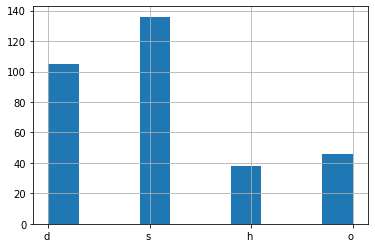

In [8]:
train['class'].hist()

From the results of counting the number of instances for each class label, this is an <b>imbalanced</b> training set. The number of d or s class is more than twice than h or o.

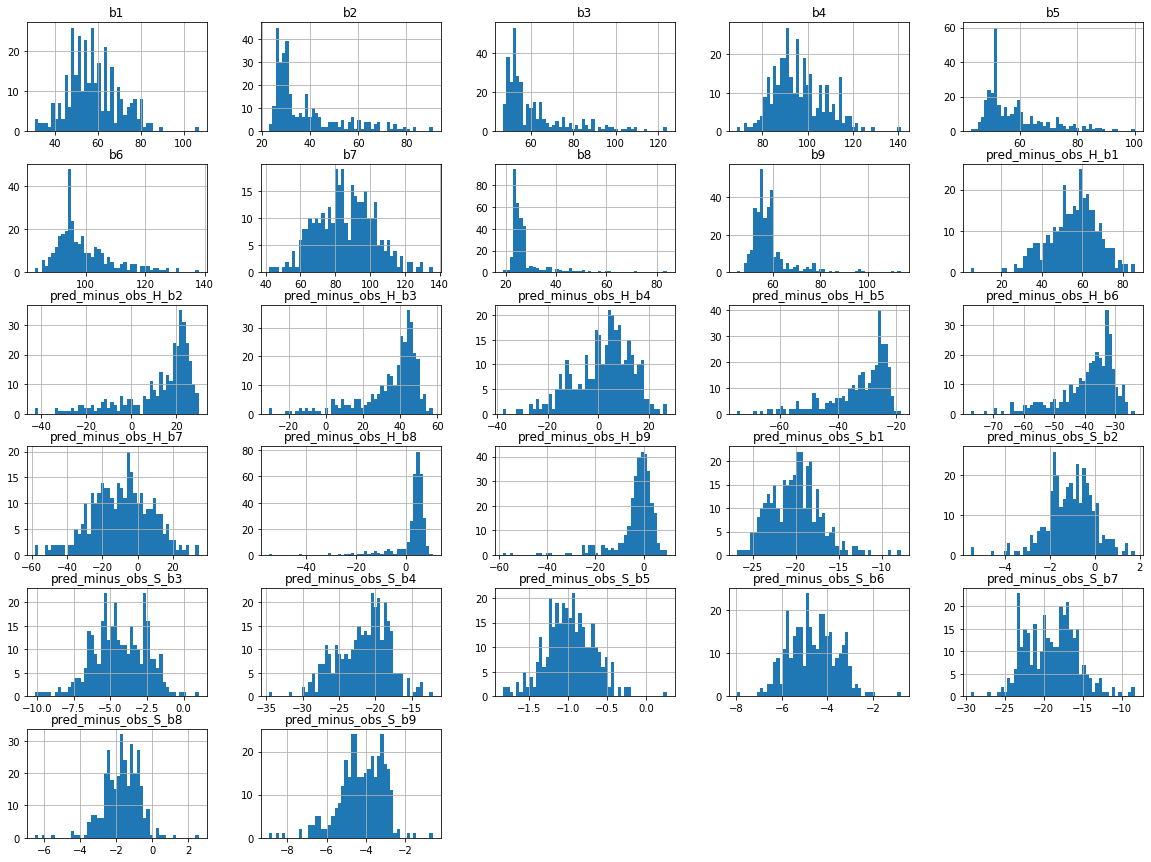

In [9]:
import matplotlib.pyplot as plt
train.hist(bins = 50, figsize = (20,15))
plt.show()

There are some distributions of all features via histogram. For example, the ASTER image band for green is broad, but the ASTER image bands for red and near infrared wavelengths mainly concentrated on the small range. From the three dates records, the ASTER image bands have the same pattern in the each color. 

In [10]:
import seaborn as sns

In [11]:
train.iloc[1:5,0:10]

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
1,s,67,28,51,99,50,97,82,26,59
2,s,63,26,50,95,49,91,81,26,57
3,d,63,42,63,97,66,108,111,28,59
4,s,46,27,50,83,51,90,76,26,56


In [13]:
sns.set(style="ticks", color_codes=True)

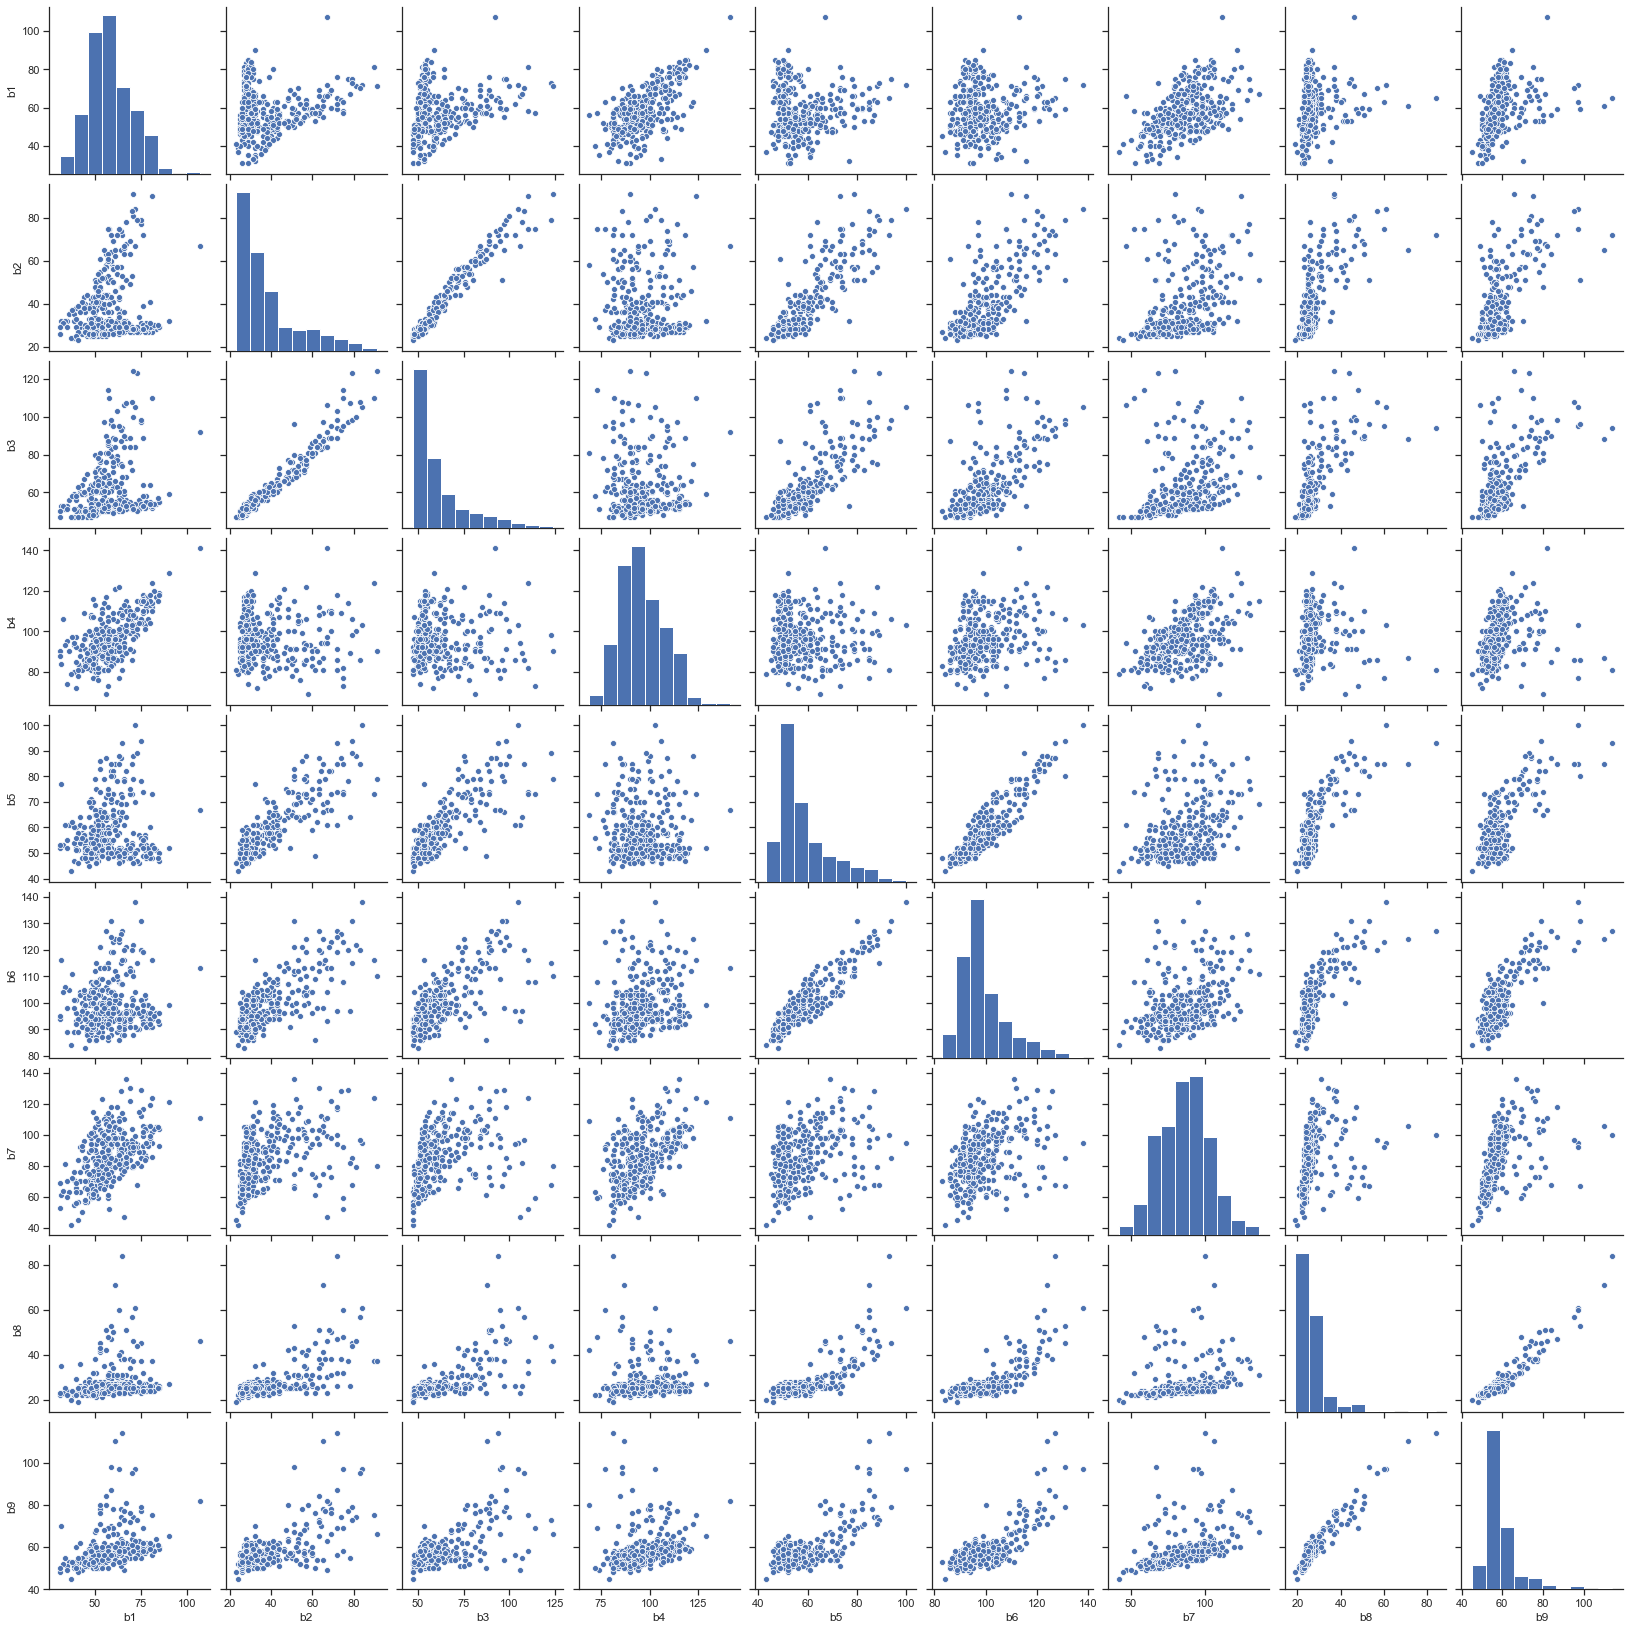

In [14]:
g = sns.pairplot(train.iloc[:,1:10])

Using the pairs plot, it is clear to know the relationship with each feature. The ASTER image band for red and near infrared wavelengths have strong correlation in three different dates.

In [15]:
ntrain = train.iloc[:,0:10]
ntest = test.iloc[:,0:10]

In [16]:
ntrain_labels = ntrain['class'].copy()
ntrain = ntrain.drop('class', axis=1)

In [17]:
ntrain_labels.shape

(325,)

In [18]:
ntrain.shape

(325, 9)

In [19]:
ntest_labels = ntest['class'].copy()
ntest = ntest.drop('class', axis=1)

In [20]:
ntest.shape

(198, 9)

Based on previous analysis, <b>ntrain</b> and <b>ntest</b> were created after removing all the columns whose names begin with pred_minus_obs. Besides, <b>ntrain_labels</b> and <b>ntest_labels</b> were extracted from the both datasets.

### 3. Normalize the data

In [21]:
from sklearn.pipeline import Pipeline

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
num_pipeline = Pipeline([('std_scaler', StandardScaler())])

In [24]:
ntrain_num_tr = num_pipeline.fit_transform(ntrain)

In [25]:
ntrain_num_tr

array([[ 0.76823994,  0.86623295,  0.43606029, ...,  3.01708854,
         0.48758236,  0.91533208],
       [ 0.76823994, -0.71267251, -0.69876454, ..., -0.23256801,
        -0.1850164 ,  0.01352708],
       [ 0.42598088, -0.84996863, -0.76551894, ..., -0.29274684,
        -0.1850164 , -0.21192418],
       ...,
       [-0.7719258 , -0.84996863, -0.89902774, ..., -1.43614451,
        -0.72309541, -0.66282668],
       [-0.25853722, -0.84996863, -0.63201013, ..., -1.25560804,
        -0.58857565, -0.3246498 ],
       [ 1.11049899, -0.71267251, -0.69876454, ...,  0.36922024,
        -0.31953615, -0.09919855]])

In [26]:
ntest_num_tr = num_pipeline.fit_transform(ntest)

<b>Standardizing</b> the train set and test set via <b>pipeline</b>, it ensure the both datasets scaled by the same function.

### 4. Build the model via Support Vector Classifier

In [28]:
from sklearn import svm

In [29]:
clf = svm.SVC()

In [30]:
clf.fit(ntrain_num_tr, ntrain_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
ntrain_num_tr.shape

(325, 9)

In [32]:
ntrain_num_tr[0]

array([0.76823994, 0.86623295, 0.43606029, 1.69545084, 1.02472372,
       1.25241468, 3.01708854, 0.48758236, 0.91533208])

In [33]:
ntest_predict = clf.predict(ntest_num_tr)

In [34]:
clf.score(ntest_num_tr, ntest_labels)

0.8434343434343434

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(ntest_labels, ntest_predict)

array([[53,  0,  1,  0],
       [ 0, 26,  0, 22],
       [ 6,  0, 31,  0],
       [ 1,  1,  0, 57]], dtype=int64)

In [37]:
from sklearn.metrics import plot_confusion_matrix

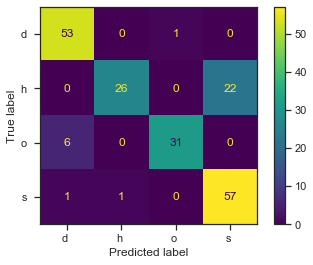

In [38]:
disp = plot_confusion_matrix(clf, ntest_num_tr, ntest_labels)

In [56]:
clf2 = svm.SVC(class_weight="balanced")

In [57]:
clf2.fit(ntrain_num_tr, ntrain_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
ntest_predict2 = clf2.predict(ntest_num_tr)

In [59]:
clf2.score(ntest_num_tr, ntest_labels)

0.9040404040404041

In [60]:
confusion_matrix(ntest_labels, ntest_predict2)

array([[53,  0,  1,  0],
       [ 0, 37,  0, 11],
       [ 5,  0, 32,  0],
       [ 1,  1,  0, 57]], dtype=int64)

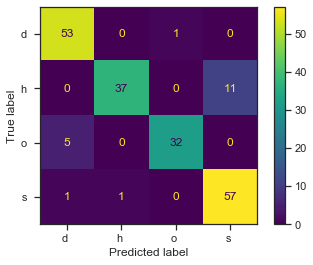

In [61]:
disp = plot_confusion_matrix(clf2, ntest_num_tr, ntest_labels)

In [71]:
clf3 = svm.SVC(kernel='linear', class_weight="balanced", C=100)

In [72]:
clf3.fit(ntrain_num_tr, ntrain_labels)

SVC(C=100, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
ntest_predict3 = clf3.predict(ntest_num_tr)

In [74]:
clf3.score(ntest_num_tr, ntest_labels)

0.9292929292929293

In [75]:
confusion_matrix(ntest_labels, ntest_predict3)

array([[53,  0,  1,  0],
       [ 0, 43,  0,  5],
       [ 3,  0, 34,  0],
       [ 0,  4,  1, 54]], dtype=int64)

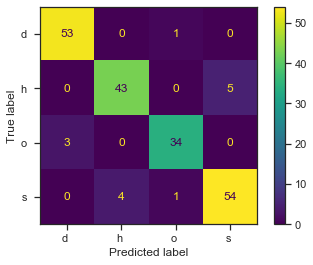

In [76]:
disp = plot_confusion_matrix(clf3, ntest_num_tr, ntest_labels)

<b>clf</b> is the first model with default argument, none class weight and 'rbf' kernel etc. <b>clf2</b> is built by changing class weight argument into "balanced", which could increase the corrected rate significantly 90%. Modifying the kernel as "linear", class weight as "balanced" as well as improving the value C to 100 (the street more narrower) in this model, the corrected rate in <b>clf3</b> is closed to about 92.92%. Thus, the optimal model is **clf3** compared with other two models. 

### 5. Build the model via Stochastic Gradient Descent Classifier

In [112]:
from sklearn.linear_model import SGDClassifier

In [151]:
SGDclf = SGDClassifier(random_state=5000)

In [152]:
SGDclf.fit(ntrain_num_tr, ntrain_labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=5000, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [153]:
SGDpredict = SGDclf.predict(ntest_num_tr)

In [154]:
SGDclf.score(ntest_num_tr, ntest_labels)

0.8888888888888888

In [155]:
confusion_matrix(ntest_labels, SGDpredict)

array([[52,  0,  1,  1],
       [ 0, 36,  0, 12],
       [ 6,  0, 31,  0],
       [ 0,  1,  1, 57]], dtype=int64)

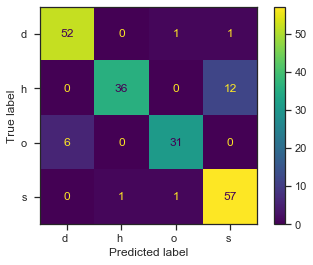

In [156]:
disp = plot_confusion_matrix(SGDclf, ntest_num_tr, ntest_labels)

In [157]:
SGDclf2 = SGDClassifier(class_weight="balanced", random_state=5000)

In [158]:
SGDclf2.fit(ntrain_num_tr, ntrain_labels)

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=5000, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [159]:
SGDclf2.score(ntest_num_tr, ntest_labels)

0.9040404040404041

In [160]:
SGDpredict2 = SGDclf2.predict(ntest_num_tr)

In [161]:
confusion_matrix(ntest_labels, SGDpredict2)

array([[51,  0,  2,  1],
       [ 0, 42,  0,  6],
       [ 0,  0, 37,  0],
       [ 0,  9,  1, 49]], dtype=int64)

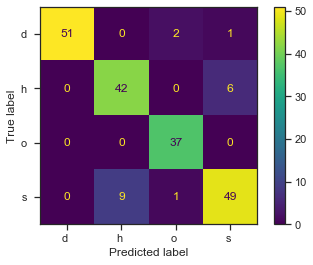

In [162]:
disp = plot_confusion_matrix(SGDclf2, ntest_num_tr, ntest_labels)

In [166]:
SGDclf3 = SGDClassifier(penalty='l1', class_weight='balanced', random_state=5000)

In [167]:
SGDclf3.fit(ntrain_num_tr, ntrain_labels)

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=5000, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [168]:
SGDclf3.score(ntest_num_tr, ntest_labels)

0.9141414141414141

In [169]:
SGDpredict3 = SGDclf3.predict(ntest_num_tr)

In [170]:
confusion_matrix(ntest_labels, SGDpredict3)

array([[53,  0,  1,  0],
       [ 0, 40,  0,  8],
       [ 4,  0, 33,  0],
       [ 0,  3,  1, 55]], dtype=int64)

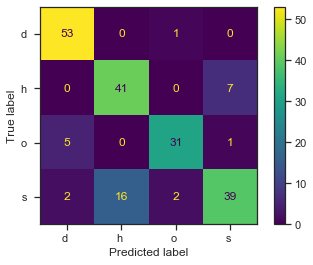

In [146]:
disp = plot_confusion_matrix(SGDclf3, ntest_num_tr, ntest_labels)

**SGDclf** is the fault model with 88.9% accuracy. When the class weight changed as balanced in **SGDclf2**, the accuracy increases to 90%. In the third model **SGDclf3**, I experienced the effect of penelty and found that l1 penelty is better than l2 with 91.4% accuracy. In conclusion, the performances of SVM and SGDClassifier are similar after modification of some hyperparameters. While, the linear SVM is easier to understand.

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(ntest_num_tr, ntest_labels)